In [41]:
import pandas as pd
from ca_utils import *
from datetime import datetime

In [84]:
df = pd.read_csv("log.csv", skip_blank_lines = True)
df = df.iloc[:,[0, 2, 4, 6,8, 10]]
df.columns = ["dev_n", "lat","lon","ele","hdg","ts"]
df.index = pd.to_datetime(df["ts"], unit="s")
df.index.name = None
df = df.drop("ts",axis=1)
df["dev_n"] = [int(df["dev_n"][i].split("/")[2]) for i in range(len(df["dev_n"]))]
df["ct12_l"] = [float("nan") for _ in range(len(df))]
df["ct12_h"] = [float("nan") for _ in range(len(df))]
df["coll12"] = [False for _ in range(len(df))]

In [85]:
df.head()

,dev_n,lat,lon,ele,hdg,ct12_l,ct12_h,coll12
2022-05-27 06:38:25.149891328,1,65.056706,25.458620,49.616,307.42,NaN,NaN,False
2022-05-27 06:38:25.399275264,2,65.057135,25.457287,49.723,306.87,NaN,NaN,False
2022-05-27 06:38:25.991138816,2,65.057148,25.457245,49.725,306.87,NaN,NaN,False
2022-05-27 06:38:26.282638336,1,65.056738,25.458525,49.573,306.93,NaN,NaN,False
2022-05-27 06:38:26.593022208,2,65.057161,25.457202,49.726,306.87,NaN,NaN,False


In [86]:
obj_dict = dict[int, moving_object]({0:moving_object(0, 0, 0, "Cow")})

In [87]:
for i in range(len(df)):
    row = df.iloc[i]
    if row.dev_n not in obj_dict:
        obj_dict[row.dev_n] = moving_object(row.lat, row.lon, row.dev_n, "Tractor", external_timestamp=row.name.timestamp())
    else:
        obj_dict[row.dev_n].update_position(row.lat, row.lon, row.hdg,external_timestamp=row.name.timestamp())

    if 1 in obj_dict and 2 in obj_dict:
        [df.iat[i,df.columns.get_loc("ct12_l")],df.iat[i,df.columns.get_loc("ct12_h")]] = moving_separating_axis_theorem(obj_dict[1], obj_dict[2])
        df.iat[i,df.columns.get_loc("coll12")] = separating_axis_theorem(obj_dict[1], obj_dict[2])



<AxesSubplot:>

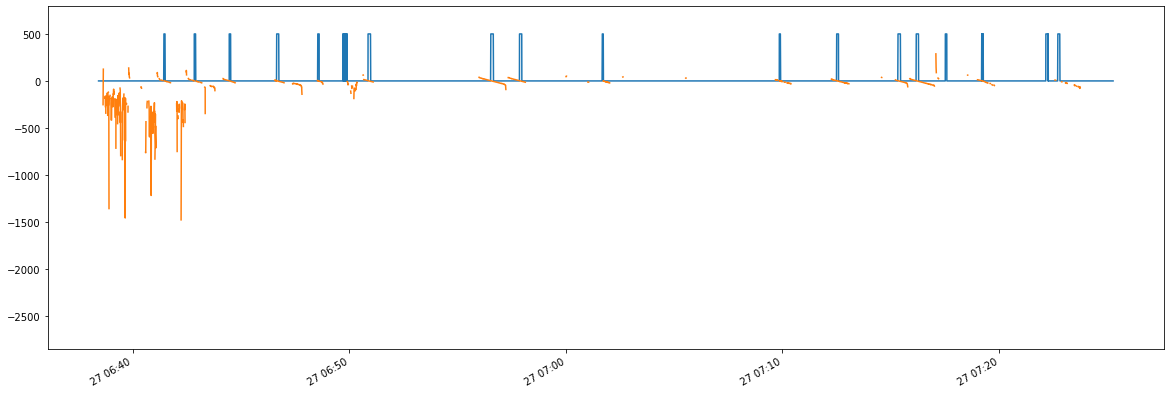

In [98]:
fig, ax = plt.subplots(figsize = (20,7))
(df["coll12"].astype("int")*500).plot()
df["ct12_l"].plot() #[df["ct12_l"].values > -250]

In [83]:
for j in range(len(a)):
    a.iat[j,0] = []

nan